In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1./(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        # using He initialization
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * \
                                   np.sqrt(2. / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = W.dot(A) + b
    
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    #print type(cache), len(cache)
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    #m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

###########
def add_del_neurons(parameters, del_threshold=0.05, prob_del=0.05, prob_add=0.01, 
                    max_hidden_size=300, num_below_margin=1):
    """
    Deletes and/or adds hidden layer neurons at the end of each epoch
    """
    assert len(parameters) == 2+2, \
    'self-selecting MLP only works with 1 hidden layer currently'
    
    Wxh = parameters['W1']
    Why = parameters['W2']
    bh = parameters['b1']
    num_features = Wxh.shape[1]
    num_labels = Why.shape[0]
    normz = (np.sum(np.abs(Why), axis = 0)) *.5
    selected = (np.abs(normz) > del_threshold)
    hidden_size = Wxh.shape[0]
    
    # deleting neurons
    if np.sum(selected) < hidden_size - num_below_margin:
        deletable = np.where(selected==False)[0]
        np.random.shuffle(deletable)
        for xx in range(num_below_margin):
            selected[deletable[xx]] = True
        deletable = deletable[num_below_margin:]
        for x in deletable:
            if np.random.rand() > prob_del:
                selected[x] = True
    
    if np.sum(selected) < hidden_size:
        print('neuron deleted')
            
    hidden_size = np.sum(selected)
    
    Wxh = Wxh[selected,:]
    normz = normz[selected]
    Why = Why[:,selected]
    bh = bh[selected]
    #need memory terms if updated per mini-batch iter instead of per epoch
    
    # adding neurons
    if hidden_size < max_hidden_size-1:
        if ( np.sum(np.abs(normz) > del_threshold) ) > hidden_size - num_below_margin \
            and ( np.random.rand() < prob_add ) or ( np.random.rand() < 1e-4 ):
            Wxh = np.append(Wxh, 0.01*np.random.randn(1,num_features), axis=0)
            
            new_Why = np.random.randn(num_labels,1)
            new_Why = .5*del_threshold*new_Why / (1e-8 + np.sum(np.abs(new_Why)))
            Why = np.append(Why, new_Why, axis=1)
            
            bh = np.append(bh, 0)
            bh = bh.reshape(bh.shape[0],1)
            
            # also need memory terms here if updating per mini-batch
            if Wxh.shape[0] > hidden_size:
                print('neuron added')
            
            hidden_size += 1
          
    parameters['W1'] = Wxh
    parameters['W2'] = Why
    parameters['b1'] = bh
    
    return parameters

###########


def L_layer_model(X, Y, layers_dims, learning_rate=0.009, num_iterations=1000, print_cost=True):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Add / delete neurons
        #parameters = add_del_neurons(parameters)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    if print_cost:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    return parameters

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    #n = len(parameters) // 2 # number of layers in the neural network
    preds = np.zeros((1,m))
    
    # Forward propagation
    yhat, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, yhat.shape[1]):
        if yhat[0,i] > 0.5:
            preds[0,i] = 1
        else:
            preds[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((preds == y)*1./m)))
        
    return preds



if __name__ == '__main__':
    data_size = 1000
    num_features = 10
    
    X = np.random.rand(num_features,data_size)
    y = np.random.randint(0,2,data_size).reshape(1,data_size)
    
    layers_dims = [X.shape[0], 10, 10, 1]
    parameters = L_layer_model(X, y, layers_dims, num_iterations=10, print_cost=False)
    preds = predict(X,y,parameters)


Accuracy: 0.5


In [2]:
# Various utility functions for self-selecting neural net implementations
# Notation used mostly follows Andrew Ng's deeplearning.ai course
# Author: Ryan Kingery (rkinger@g.clemson.edu)
# Last Updated: April 2018
# License: BSD 3 clause

# TODO: lr finder, batch size increases, lr decay, autodiff

# Functions contained:
#   sigmoid
#   tanh
#   relu
#   softmax
#   initialize_parameters
#   forwardprop
#   compute_loss
#   backprop
#   gradient_descent
#   random_mini_batches
#   initialize_momentum
#   momentum
#   initialize_adam
#   adam
#   MLP
#   StochasticMLP
#   predict
#   score

#!/usr/bin/env python2
# -*- coding: utf-8 -*-

import numpy as np
from matplotlib import pyplot as plt
from scipy.special import logsumexp
from scipy.signal import lfilter
# from ss_functions import *
#np.random.seed(42)

def sigmoid(Z):
    """
    Implements the sigmoid function a = 1/(1+exp(-z))
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    output of sigmoid(z) function, same shape as Z
    """   
    return 1./(1+np.exp(-Z))

def tanh(Z):
    """
    Implements the hyperbolic tangent function a = tanh(z)
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    output of tanh(z) function, same shape as Z
    """   
    return np.tanh(Z)

def relu(Z):
    """
    Implements the RELU function a = max(0,z)

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- output of relu(Z) function, same shape as Z
    """        
    return np.maximum(0.,Z)

def softmax(Z):
    """
    Numerically stable implementation of the softmax function a = exp(z)/sum(exp(z))
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    output of softmax(z) function, same shape as Z
    """   
    logA = Z - logsumexp(Z,axis=0).reshape(1,Z.shape[1])
    return np.exp(logA)

def initialize_parameters(layer_dims):
    """
    Arguments:
    layer_dims -- list containing the dimensions of each layer in network
    
    Returns:
    parameters -- dict of parameters W1, b1, ..., WL, bL:
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)-1            # number of layers in the network
    for l in range(1, L+1):
        # using He initialization
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * \
                                   np.sqrt(2. / layer_dims[l - 1])
        parameters['b'+str(l)] = np.zeros((layer_dims[l], 1))        
    return parameters

def forwardprop(X, parameters, problem_type):
    """
    Implements forward propagation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters function
    problem_type -- binary classification, regression, multiclass classification
                    (binary, regression, multiclass)
    
    Returns:
    yhat -- last post-activation value
    inputs -- dict of inputs containing:
                input data X
                every Z=W*A+b, for each l=1,...,L
                every A=activation(Z), for each l=1,...,L
    """
    inputs = {'A0':X}
    A = X
    L = len(parameters) // 2
    for l in range(1,L):
        A_prev = A
        W = parameters['W'+str(l)]
        b = parameters['b'+str(l)]
        Z = W.dot(A_prev) + b
        A = relu(Z)
        inputs['Z'+str(l)] = Z
        inputs['A'+str(l)] = A
    A_prev = A
    W = parameters['W'+str(L)]
    b = parameters['b'+str(L)]
    Z = W.dot(A_prev) + b
    if problem_type == 'regression':
        A = Z
    elif problem_type == 'binary':
        A = sigmoid(Z)
        A = np.clip(A,1e-8,1.-1e-8)     # clip to prevent loss from blowing up
    elif problem_type == 'multiclass':
        A = softmax(Z)
        A = np.clip(A,1e-8,1.-1e-8)     # clip to prevent loss from blowing up
    inputs['Z'+str(L)] = Z
    inputs['A'+str(L)] = A
    yhat = A
    return yhat,inputs

def flatten_weights(parameters):
    L = len(parameters) // 2
    w = np.array([])
    for l in range(1,L+1):
        w = np.append(w,parameters['W'+str(l)].flatten())
    return w

def compute_loss(yhat, y, parameters, reg_param, problem_type):
    """
    Compute average loss over dataset

    Arguments:
    activations -- dictionary of all activations from forward propagation
    y -- true "label" vector (e.g. 0 if non-cat, 1 if cat), shape (1, num examples)
    problem_type -- binary classification, regression, multiclass classification
                    (binary, regression, multiclass)

    Returns:
    loss -- cross-entropy loss
    """   
    m = y.shape[1]
    # calculate base loss
    if problem_type == 'regression':
        loss = 1./(2*m)*np.sum((y-yhat)**2)
    elif problem_type == 'binary':
        loss = 1./m*(-np.dot(y,np.log(yhat).T)-np.dot(1-y, np.log(1-yhat).T))
    elif problem_type == 'multiclass':
        loss = -1./m*np.sum(np.sum(y*np.log(yhat),axis=0))
    loss = np.squeeze(loss)      # turns [[17]] into 17).
    
    # add L1 regularization term
    w = flatten_weights(parameters)
    loss += 1./m*reg_param*np.sum(np.abs(w))
    
    return loss

def backprop(yhat, y, inputs, parameters, problem_type):
    """
    Implements backward propagation
    
    Arguments:
    yhat -- probability vector, output of the forward propagation
    y -- true "label" vector (e.g. 0 if non-cat, 1 if cat)
    inputs -- dict of inputs outputted from forward propagation:
    parameters -- dict of parameter weights and biases
    problem_type -- binary classification, regression, multiclass classification
                    (binary, regression, multiclass)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = d loss / dA
             grads["dW" + str(l)] = d loss / dW
             grads["db" + str(l)] = d loss / db
    """
    grads = {}
    L = len(parameters) // 2
    y = y.reshape(yhat.shape)
 
    Z = inputs['Z'+str(L)]
    A_prev = inputs['A'+str(L-1)]
    W = parameters['W'+str(L)]
    
    if problem_type == 'regression':
        m = y.shape[1]
        dyhat = -1./m * (y-yhat)          
        m = A_prev.shape[1]           
        dZ = dyhat
    elif problem_type == 'binary':
        dyhat = - (np.divide(y,yhat) - np.divide(1-y, 1-yhat))
        m = A_prev.shape[1]
        dZ = dyhat*sigmoid(Z)*(1-sigmoid(Z))
    elif problem_type == 'multiclass':
        m = A_prev.shape[1]  
        dZ = yhat-y
        
    dA_prev = np.dot(W.T,dZ)
    dW = 1./m*np.dot(dZ,A_prev.T)
    db = 1./m*np.sum(dZ,axis=1,keepdims=True)

    grads['dA'+str(L-1)] = dA_prev
    grads['dW'+str(L)] = dW
    grads['db'+str(L)] = db
    
    for l in reversed(range(1,L)):
        Z = inputs['Z'+str(l)]
        A_prev = inputs['A'+str(l-1)]
        W = parameters['W'+str(l)]
        m = A_prev.shape[1]
        
        dZ = np.array(dA_prev, copy=True)
        dZ[Z <= 0] = 0
        dA_prev = np.dot(W.T,dZ)
        dW = 1./m*np.dot(dZ,A_prev.T)
        db = 1./m*np.sum(dZ,axis=1,keepdims=True)

        grads['dA'+str(l-1)] = dA_prev
        grads['dW'+str(l)] = dW
        grads['db'+str(l)] = db
    
    return grads

def gradient_descent(parameters, grads, lr, reg_param, data_size):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- dict containing network parameters 
    grads -- dict containing gradients backprop
    lr -- learning rate for gradient descent (default=0.001)
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = Wl 
                  parameters["b" + str(l)] = bl
    """

    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):        
        parameters['W'+str(l+1)] -= lr*(grads['dW'+str(l+1)]) #+ 
                  #(1./data_size)*reg_param*np.sign(parameters['W'+str(l+1)]))
        parameters['b'+str(l+1)] -= lr*grads['db'+str(l+1)]                
    return parameters

def random_mini_batches(X, y, batch_size, seed):
    """
    Creates a list of random minibatches from (X, y)
    
    Arguments:
    X -- input data, of shape (num features, data size)
    y -- true labels, of shape (num labels, data size)
    batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_y)
    """
    
    np.random.seed(seed)
    
    m = y.shape[1]
    k = y.shape[0]
    mini_batches = []
    
    #if batch_size >= m:
    #    mini_batches = [(X,y)]
    if True:#else:
        # Step 1: Shuffle (X, Y)
        permutation = list(np.random.permutation(m))
        shuffled_X = X[:, permutation]
        shuffled_y = y[:, permutation].reshape((k,m))
    
        # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
        num_complete_minibatches = int(np.floor(m*1./batch_size)) # number of batches in partition
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[:, k * batch_size : (k+1) * batch_size]
            mini_batch_y = shuffled_y[:, k * batch_size : (k+1) * batch_size]
            mini_batch = (mini_batch_X, mini_batch_y)
            mini_batches.append(mini_batch)
        
        # Handling the end case (last mini-batch < mini_batch_size)
        if m % batch_size != 0:
            mini_batch_X = shuffled_X[:, num_complete_minibatches * batch_size :]
            mini_batch_y = shuffled_y[:, num_complete_minibatches * batch_size :]
            mini_batch = (mini_batch_X, mini_batch_y)
            mini_batches.append(mini_batch)
    return mini_batches

def initialize_momentum(parameters):
    """
    Initializes momentum as a dict:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: array of zeros, same size as parameters
    Arguments:
    parameters -- dict of parameters
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    m -- dict of momentum values
                    m['dW' + str(l)] = momentum of dWl
                    m['db' + str(l)] = momentum of dbl
    """
    
    L = len(parameters) // 2 # number of layers
    m = {}

    for l in range(L):
        m['dW'+str(l+1)] = np.zeros(parameters['W'+str(l+1)].shape)
        m['db'+str(l+1)] = np.zeros(parameters['b'+str(l+1)].shape)
        
    return m

def momentum(parameters, grads, m, beta, lr, reg_param, data_size):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- dict of parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- dict of gradients for each parameter:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    m -- dict of current momentum values:
                    m['dW' + str(l)] = ...
                    m['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    lr -- the learning rate, scalar
    
    Returns:
    parameters -- dict of parameters 
    m -- dict of momentum values
    """

    L = len(parameters) // 2 # number of layers
    
    for l in range(L):
        # compute momentum
        m["dW" + str(l+1)] = beta*m["dW" + str(l+1)] + (1-beta)*grads['dW' + str(l+1)]
        m["db" + str(l+1)] = beta*m["db" + str(l+1)] + (1-beta)*grads['db' + str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] -= lr*(m["dW" + str(l+1)]) #+ 
                  #(1./data_size)*reg_param*np.sign(parameters['W'+str(l+1)]))
        parameters["b" + str(l+1)] -= lr*m["db" + str(l+1)]
        
    return parameters, m

def initialize_adam(parameters) :
    """
    Initializes m and v as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    m -- dict containing exponentially weighted average of the gradient.
                    m["dW" + str(l)] = ...
                    m["db" + str(l)] = ...
    v -- dict containing exponentially weighted average of the squared gradient.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers
    m = {}
    v = {}

    for l in range(L):
        m["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        m["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    
    return m, v

def adam(parameters, grads, m, v, t, lr, beta1, beta2, epsilon, reg_param, data_size):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    m -- Adam variable, moving average of the first gradient moment, dict
    v -- Adam variable, moving average of the second gradient moment, dict
    lr -- the learning rate, scalar
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    m -- Adam variable, moving average of the first gradient moment, dict
    v -- Adam variable, moving average of the second gradient moment, dict
    """
    
    L = len(parameters) // 2         # number of layers
    m_corrected = {}
    v_corrected = {}
    
    for l in range(L):
        # Moving average of the gradients
        m["dW" + str(l+1)] = beta1*m["dW" + str(l+1)] + (1-beta1)*grads['dW' + str(l+1)]
        m["db" + str(l+1)] = beta1*m["db" + str(l+1)] + (1-beta1)*grads['db' + str(l+1)]
        #print np.all((m["dW" + str(l+1)] - grads['dW' + str(l+1)]) < 1e-5)
        # Compute bias-corrected first moment estimate
        m_corrected["dW" + str(l+1)] = m["dW" + str(l+1)]/(1-beta1**t)
        m_corrected["db" + str(l+1)] = m["db" + str(l+1)]/(1-beta1**t)

        # Moving average of the squared gradients
        v["dW" + str(l+1)] = beta2*v["dW" + str(l+1)] + (1-beta2)*np.power(grads['dW' + str(l+1)],2)
        v["db" + str(l+1)] = beta2*v["db" + str(l+1)] + (1-beta2)*np.power(grads['db' + str(l+1)],2)
        #print np.all((v["dW" + str(l+1)] - grads['dW' + str(l+1)]) < 1e-5)
        # Compute bias-corrected second raw moment estimate
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1-beta2**t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1-beta2**t)

        # Update parameters
        parameters["W" + str(l+1)] -= lr*(np.divide(m_corrected["dW" + str(l+1)],
                  np.sqrt(v_corrected["dW" + str(l+1)])+epsilon)) #+ 
                  #(1./data_size)*reg_param*np.sign(parameters['W'+str(l+1)]))
        parameters["b" + str(l+1)] -= lr*np.divide(m_corrected["db" + str(l+1)],
                  np.sqrt(v_corrected["db" + str(l+1)])+epsilon)

    return parameters, m, v

def MLP(X, y, layer_dims, problem_type, X_test, y_test, lr, num_iters, print_loss, add_del, 
        reg_param, delta,prob,epsilon,max_hidden_size,tau):
        #del_threshold, prob_del, prob_add, max_hidden_size, num_below_margin):
    """
    Implements a L-layer multilayer perceptron (MLP)
    
    Arguments:
    X -- data, numpy array of shape (num data, num features)
    y -- true "label" vector (e.g. 0 if cat, 1 if non-cat), of shape (1, num data)
    layers_dims -- list containing input size and each layer size, length (num layers + 1).
    lr -- learning rate of the gradient descent update rule
    num_iters -- number of iterations of the optimization loop
    print_loss -- if True, it prints the cost every few steps
    
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
    losses = []                
    test_losses = []
    all_losses = []
    num_neurons = []
    
    # Parameters initialization.
    parameters = initialize_parameters(layer_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iters):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        yhat,inputs = forwardprop(X, parameters, problem_type)
        
        # Compute cost.
        loss = compute_loss(yhat, y, parameters, reg_param, problem_type)
    
        # Backward propagation.
        grads = backprop(yhat, y, inputs, parameters, problem_type)        
 
        # Update parameters.
        data_size = y.shape[1]
        parameters = gradient_descent(parameters, grads, lr, reg_param, data_size)

        all_losses.append(loss)

        # Add / delete neurons
        if add_del:
            num_neuron = parameters['b1'].shape[0]
            if i>tau:
                #parameters = add_del_neurons_orig(parameters,print_add_del,i,del_threshold, 
                #                             prob_del,prob_add,max_hidden_size,num_below_margin)
                parameters = delete_neurons(parameters,delta,prob)
                parameters = add_neurons(parameters,all_losses,epsilon,delta,
                                         max_hidden_size,tau,prob)
            
        if X_test is not None and y_test is not None:
            yhat_test,_ = forwardprop(X_test, parameters, problem_type)
            test_loss = compute_loss(yhat_test, y_test, parameters, reg_param, problem_type)

        # Print the cost every 100 training example
        num_prints = max(1,num_iters // 20)
        if print_loss and i % num_prints == 0:
            print('Loss after iteration %i: %f' % (i, loss))
            if add_del:
                print('Number of neurons %i: %d' % (i, num_neuron))
            if X_test is not None and y_test is not None:
                print ("Test loss after epoch %i: %f" %(i, test_loss))
                
        num_losses = 1#max(1,num_iters // 100)
        if i % num_losses == 0:
            losses.append(loss)
            if add_del:
                num_neurons.append(num_neuron)
            if X_test is not None and y_test is not None:
                    test_losses.append(test_loss)        
        
        #if i>0 and i%1000 == 0:
        #    lr = lr/(1+0.0*i)
        #    print('learning rate reduced to %f' % lr)
            
    # plot the cost
#    if print_loss:
#        xx = np.linspace(1,num_iters+1,num=num_iters)
#        plt.plot(xx,losses,color='blue',label='train')
#        if X_test is not None and y_test is not None:
#            plt.plot(xx,test_losses,color='red',label='test')
#        plt.legend(loc='upper right')
#        plt.ylabel('loss')
#        plt.xlabel('iterations')
#        plt.title('Loss')
#        plt.show()
#        
#    if add_del:
#        filt_neurons = lfilter([1.0/50]*50,1,num_neurons)
#        xx = np.linspace(1,num_iters+1,num=num_iters)
#        plt.plot(xx,filt_neurons,color='green',label='# neurons')
#        plt.ylabel('# neurons')
#        plt.xlabel('epochs')
#        plt.title('Number of neurons')
#        plt.show()
        
    return parameters, losses, test_losses, num_neurons

def StochasticMLP(X, y, layer_dims, problem_type, X_test, y_test, optimizer, lr, batch_size,
                  beta1, beta2, eps, num_epochs, print_loss, add_del, reg_param,
                  delta,prob,epsilon,max_hidden_size,tau):
                  #del_threshold, prob_del, prob_add, max_hidden_size, num_below_margin):
    """
    MLP which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (num features, data size)
    y -- true "label" vector, shape (num classes, data size)
    layer_dims -- list, containing the size of each layer
    lr -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_loss -- True to print the loss every 1000 epochs

    Returns:
    parameters -- dict of parameters 
    """
    #X = X.T
    #y = y.T
    losses = []
    test_losses = []
    all_losses = []
    num_neurons = []
    t = 0                            # counter required for Adam update
    seed = 42
    
    # Initialize parameters
    parameters = initialize_parameters(layer_dims)
    #num_neuron = parameters['b1'].shape[0]
    #num_neurons.append(num_neuron)

    # Initialize the optimizer
    if optimizer == "sgd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        m = initialize_momentum(parameters)
    elif optimizer == "adam":
        m,v = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):        
        # Define the random minibatches
        seed += 1 # reshuffles the dataset differently after each epoch
        minibatches = random_mini_batches(X, y, batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            minibatch_X, minibatch_y = minibatch

            # Forward propagation
            yhat,inputs = forwardprop(minibatch_X, parameters, problem_type)

            # Compute cost
            loss = compute_loss(yhat, minibatch_y, parameters, reg_param, problem_type)

            # Backward propagation
            grads = backprop(yhat, minibatch_y, inputs, parameters, problem_type) 

            # Update parameters
            num_in_batch = minibatch_y.shape[1]
            if optimizer == "sgd":
                parameters = gradient_descent(parameters,grads,lr,reg_param,num_in_batch)
            elif optimizer == "momentum":
                parameters, m = momentum(parameters,grads,m,beta1,lr,reg_param,num_in_batch)
            elif optimizer == "adam":
                t += 1 # Adam counter
                parameters, m, v = adam(parameters,grads,m,v,t,lr,beta1,beta2,eps,
                                        reg_param,num_in_batch)
            all_losses.append(loss)
        
        # Add / delete neurons
        if add_del and i>tau:
            if optimizer == 'sgd':
                #parameters = add_del_neurons_orig(parameters,print_add_del,i,del_threshold, 
                #                         prob_del,prob_add,max_hidden_size,num_below_margin)
                parameters = delete_neurons(parameters,delta,prob)
                parameters = add_neurons(parameters,all_losses,epsilon,delta,
                                         max_hidden_size,tau,prob)                
            if optimizer == 'adam':
                parameters,m,v = delete_neurons_adam(parameters,m,v,delta,prob)
                parameters,m,v = add_neurons_adam(parameters,m,v,all_losses,epsilon,max_hidden_size,tau,prob)
                #print len(add_neurons_adam(parameters,m,v,all_losses,epsilon,max_hidden_size,tau,prob))
            
        if X_test is not None and y_test is not None:
            minibatches = random_mini_batches(X_test, y_test, batch_size, seed)
            for minibatch in minibatches:

                # Select a minibatch
                minibatch_X, minibatch_y = minibatch
    
                # Forward propagation
                yhat_test,_ = forwardprop(minibatch_X, parameters, problem_type)
    
                # Compute cost
                test_loss = compute_loss(yhat_test, minibatch_y, parameters, reg_param, problem_type)
        
        if add_del:
            num_neuron = parameters['b1'].shape[0]
        
        # Print the every few losses
        num_prints = max(1,num_epochs // 20)
        if print_loss and i % num_prints == 0:
            print ("Training loss after epoch %i: %f" %(i, loss))
            if add_del:
                print ("Number of neurons %i: %d" %(i, num_neuron))
            if X_test is not None and y_test is not None:
                print ("Test loss after epoch %i: %f" %(i, test_loss))
                
        num_losses = max(1,num_epochs // 100)
        if i % num_losses == 0:
            losses.append(loss)
            if add_del:
                num_neurons.append(num_neuron)
            if X_test is not None and y_test is not None:
                    test_losses.append(test_loss)
                
    # plot the cost
    if print_loss:
        xx = np.linspace(1,num_epochs+1,num=100)
        plt.plot(xx,losses,color='blue',label='train')
        if X_test is not None and y_test is not None:
            plt.plot(xx,test_losses,color='red',label='test')
        plt.legend(loc='upper right')
        plt.ylabel('loss')
        plt.xlabel('epochs')
        plt.title('Loss')
        plt.show()
        
    if add_del:
        xx = np.linspace(1,num_epochs+1,num=100)
        plt.plot(xx,num_neurons,color='green',label='# neurons')
        plt.ylabel('# neurons')
        plt.xlabel('epochs')
        plt.title('Number of neurons')
        plt.show()

    return parameters, losses, test_losses

def predict(X, parameters, problem_type):
    """
    Uses neural net parameters to predict labels for input data X
    
    Arguments:
    X -- dataset to predict labels for
    parameters -- parameters of the trained model
    
    Returns:
    preds -- predictioned labels for dataset X
    """   
    m = X.shape[1]
    yhat,_ = forwardprop(X, parameters, problem_type)
    preds = np.zeros(yhat.shape)
    if problem_type == 'regression':
        preds = yhat
    elif problem_type == 'binary':
        for i in range(0, yhat.shape[1]):
            if yhat[0,i] > 0.5:
                preds[0,i] = 1
            else:
                preds[0,i] = 0 
    elif problem_type == 'multiclass':
        max_idxs = np.argmax(yhat, axis=0)
        for i in range(m):
            imax = max_idxs[i]
            preds[imax,i] = 1
    return preds

def score(X, y, parameters, problem_type):
    """
    Calculates accuracy of neural net on inputs X, true labels y
    
    Arguments:
    X -- dataset to predict labels for
    y -- true labels for X
    parameters -- parameters of the trained model
    
    Returns:
    acc -- num correctly predict labels / num total labels (if classification)
           R^2 value (if regression)
    """
    m = X.shape[1]
    if problem_type == 'regression':
        preds = predict(X,parameters,problem_type)    
        ssr = np.sum((y-preds)**2)
        sst = np.sum((y-np.mean(y,axis=1))**2)
        acc = 1.-ssr/sst
    elif problem_type == 'binary':
        preds = predict(X,parameters,problem_type)
        acc = np.sum((preds == y)*1./m)
    elif problem_type == 'multiclass':
        yhat,_ = forwardprop(X, parameters, problem_type)
        acc = 1./m*np.count_nonzero(np.argmax(yhat, axis=0) == np.argmax(y, axis=0))
    return acc

In [3]:
# File contains all self-selection functions to add/delete neurons
# Notation used mostly follows Andrew Ng's deeplearning.ai course
# Author: Ryan Kingery (rkinger@g.clemson.edu)
# Last Updated: April 2018
# License: BSD 3 clause

# Functions contained:
#   delete_neurons
#   add_neurons
#   delete_neurons_adam
#   add_neurons_adam
#   add_del_neurons_orig

import numpy as np
import torch
from scipy.signal import lfilter
#np.random.seed(42)


def delete_neurons(parameters,delta,prob):
    """
    Deletes neurons with small outgoing weights from layer
    """
    assert len(parameters) == 2+2, \
    'self-selecting MLP only works with 1 hidden layer currently'
    l = 1   # applying to layer 1, plan to extend to other layers later
    
    W_out = parameters['W'+str(l+1)]    
    hidden_size = W_out.shape[1]
    
    norms = np.sum(np.abs(W_out),axis=0)
    max_out = np.max(norms)
    selected = (norms == norms) # initialize all True == keep all neurons
    
    for j in range(hidden_size):
        norm = norms[j]
        if (norm < delta*max_out) and (np.random.rand() < prob):
            # remove neuron j with probability prob
            selected[j] = False
    
    if np.sum(selected) == 0:
        # don't want ALL neurons in layer deleted or training will crash
        # keep neuron with largest outgoing weights if this occurs
        selected[np.argmax(norms)] = True
                    
    parameters['W'+str(l)] = parameters['W'+str(l)][selected,:]
    parameters['b'+str(l)] = parameters['b'+str(l)][selected,:]
    parameters['W'+str(l+1)] = parameters['W'+str(l+1)][:,selected]
    
    return parameters


def add_neurons(parameters,losses,epsilon,delta,max_hidden_size,tau,prob):
    """
    Add neuron to bottom of layer if loss is stalling
    """
    assert len(parameters) == 2+2, \
    'self-selecting MLP only works with 1 hidden layer currently'
    l = 1   # applying to layer 1, plan to extend to other layers later
    
    W_in = parameters['W'+str(l)]
    b_in = parameters['b'+str(l)]
    W_out = parameters['W'+str(l+1)]    
    hidden_size = b_in.shape[0]
    
    if hidden_size >= max_hidden_size:
        return parameters
    
    max_loss = np.max(losses)
    filt_losses = lfilter([1.0/5]*5,1,losses) # filter noise with FIR filter
    losses = filt_losses[-tau:]  # keep only losses in window t-tau,...,t
    upper = np.mean(losses) + epsilon*max_loss
    lower = np.mean(losses) - epsilon*max_loss
    num_out_of_window = np.logical_or((losses < lower),(losses > upper))
    
    if (np.sum(num_out_of_window) == 0) and (np.random.rand() < prob):
        # if losses in window are too similar, add neuron with probability prob
        delta = 0.1#3.*delta
        new_W_in = np.random.normal(0,2.*delta,size=(1,W_in.shape[1]))
        new_b_in = np.zeros((1,1))
        new_W_out = np.random.normal(0,2.*delta,size=(W_out.shape[0],1))
        W_in = np.append(W_in, new_W_in, axis=0)
        b_in = np.append(b_in, new_b_in, axis=0)
        W_out = np.append(W_out, new_W_out, axis=1)    
    
    parameters['W'+str(l)] = W_in
    parameters['b'+str(l)] = b_in
    parameters['W'+str(l+1)] = W_out
    
    return parameters    


def delete_neurons_adam(parameters,m,v,delta,prob):
    """
    Deletes neurons with small outgoing weights from layer, for use with Adam
    """
    assert len(parameters) == 2+2, \
    'self-selecting MLP only works with 1 hidden layer currently'
    l = 1   # applying to layer 1, plan to extend to other layers later
    
    W_out = parameters['W'+str(l+1)]    
    hidden_size = W_out.shape[1]
    
    norms = np.sum(np.abs(W_out),axis=0)
    selected = (norms == norms) # initialize all True == keep all neurons
    
    for j in range(hidden_size):
        norm = norms[j]
        if (norm < delta) and (np.random.rand() < prob):
            # remove neuron j with probability prob
            selected[j] = False
    
    if np.sum(selected) == 0:
        # don't want ALL neurons in layer deleted or training will crash
        # keep neuron with largest outgoing weights if this occurs
        selected[np.argmax(norms)] = True
                    
    parameters['W'+str(l)] = parameters['W'+str(l)][selected,:]
    parameters['b'+str(l)] = parameters['b'+str(l)][selected,:]
    parameters['W'+str(l+1)] = parameters['W'+str(l+1)][:,selected]

    m['dW'+str(l)] = m['dW'+str(l)][selected,:]
    m['db'+str(l)] = m['db'+str(l)][selected,:]
    m['dW'+str(l+1)] = m['dW'+str(l+1)][:,selected]
    
    v['dW'+str(l)] = v['dW'+str(l)][selected,:]
    v['db'+str(l)] = v['db'+str(l)][selected,:]
    v['dW'+str(l+1)] = v['dW'+str(l+1)][:,selected]
    
    return parameters,m,v


def add_neurons_adam(parameters,m,v,losses,epsilon,max_hidden_size,tau,prob):
    """
    Add neuron to bottom of layer if loss is stalling, for use with Adam
    """
    assert len(parameters) == 2+2, \
    'self-selecting MLP only works with 1 hidden layer currently'
    l = 1   # applying to layer 1, plan to extend to other layers later
    
    W_in = parameters['W'+str(l)]
    b_in = parameters['b'+str(l)]
    W_out = parameters['W'+str(l+1)]    
    hidden_size = b_in.shape[0]
    
    mW_in = m['dW'+str(l)]
    mb_in = m['db'+str(l)]
    mW_out = m['dW'+str(l+1)]
    
    vW_in = v['dW'+str(l)]
    vb_in = v['db'+str(l)]
    vW_out = v['dW'+str(l+1)]

    if hidden_size >= max_hidden_size:
        return parameters,m,v
    
    #max_loss = np.max(losses)
    filt_losses = lfilter([1.0/5]*5,1,losses) # filter noise with FIR filter
    losses = filt_losses[-tau:]  # keep only losses in window t-tau,...,t
    upper = np.mean(losses) + epsilon#*max_loss
    lower = np.mean(losses) - epsilon#*max_loss
    num_out_of_window = np.logical_or((losses < lower),(losses > upper))
    
    if (np.sum(num_out_of_window) == 0) and (np.random.rand() < prob):
        # if losses in window are too similar, add neuron with probability prob
        W_in = np.append(W_in, .01*np.random.randn(1,W_in.shape[1]), axis=0)
        b_in = np.append(b_in, np.zeros((1,1)), axis=0)
        W_out = np.append(W_out, .01*np.random.randn(W_out.shape[0],1), axis=1)
        
        mW_in = np.append(mW_in, .01*np.ones((1,W_in.shape[1])), axis=0)
        mb_in = np.append(mb_in, .01*np.ones((1,1)), axis=0)
        mW_out = np.append(mW_out, .01*np.ones((W_out.shape[0],1)), axis=1)

        vW_in = np.append(vW_in, .01*np.ones((1,W_in.shape[1])), axis=0)
        vb_in = np.append(vb_in, .01*np.ones((1,1)), axis=0)
        vW_out = np.append(vW_out, .01*np.ones((W_out.shape[0],1)), axis=1)        
    
    parameters['W'+str(l)] = W_in
    parameters['b'+str(l)] = b_in
    parameters['W'+str(l+1)] = W_out
    
    m['dW'+str(l)] = mW_in
    m['db'+str(l)] = mb_in
    m['dW'+str(l+1)] = mW_out
    
    v['dW'+str(l)] = vW_in
    v['db'+str(l)] = vb_in
    v['dW'+str(l+1)] = vW_out
    
    return parameters,m,v


def add_del_neurons_orig(parameters, itr, del_threshold, prob_del, prob_add, 
                         max_hidden_size, num_below_margin, print_add_del=False):
    """
    Original add_del_neurons function, closely follows Miconi
    Deletes and/or adds hidden layer neurons at the end of each epoch
    Arguments:
        parameters -- dict of parameters (weights and biases)
        print_add_del -- prints if neuron added/deleted if True (boolean)
        itr -- iteration of training (positive int)
        del_threshold -- threshold value determining neural deletion (>0)
        prob_del -- probability of deleting neuron if below threshold (0,...,1)
        prob_add -- probability of adding neuron at each iteration (0,...,1)
        max_hidden_size -- preferred max size of hidden layer (>0)
        num_below_margin -- number of below-threshold neurons not deleted (>0)
       
    Returns:
        parameters -- new dict of parameters with neurons added/deleted
    """
    assert len(parameters) == 2+2, \
    'self-selecting MLP only works with 1 hidden layer currently'
    
    Wxh = parameters['W1']
    Why = parameters['W2']
    bh = parameters['b1']
    num_features = Wxh.shape[1]
    num_labels = Why.shape[0]
    normz = (np.sum(np.abs(Why), axis = 0)) *.5
    selected = (np.abs(normz) > del_threshold)
    hidden_size = Wxh.shape[0]
    
    # deleting neurons
    if np.sum(selected) < hidden_size - num_below_margin:
        deletable = np.where(selected==False)[0]
        np.random.shuffle(deletable)
        for xx in range(num_below_margin):
            selected[deletable[xx]] = True
        deletable = deletable[num_below_margin:]
        for x in deletable:
            if np.random.rand() > prob_del:
                selected[x] = True
    
    if print_add_del and np.sum(selected) < hidden_size:
        print('neuron deleted at iteration %d' % itr)
            
    hidden_size = np.sum(selected)
    
    Wxh = Wxh[selected,:]
    normz = normz[selected]
    Why = Why[:,selected]
    bh = bh[selected]
    #need memory terms if updated per mini-batch iter instead of per epoch
    
    # adding neurons
    if hidden_size < max_hidden_size-1:
        if ( np.sum(np.abs(normz) > del_threshold) ) > hidden_size - num_below_margin \
            and ( np.random.rand() < prob_add ) or ( np.random.rand() < 1e-4 ):
            Wxh = np.append(Wxh, 0.01*np.random.randn(1,num_features), axis=0)
            
            new_Why = np.random.randn(num_labels,1)
            new_Why = .5*del_threshold*new_Why / (1e-8 + np.sum(np.abs(new_Why)))# + 0.05
            Why = np.append(Why, new_Why, axis=1)
            
            bh = np.append(bh, 0)
            bh = bh.reshape(bh.shape[0],1)
            
            # also need memory terms here if updating per mini-batch
            if print_add_del and Wxh.shape[0] > hidden_size:
               print('neuron added at iteration %d' % itr)
            
            hidden_size += 1
          
    parameters['W1'] = Wxh
    parameters['W2'] = Why
    parameters['b1'] = bh
    #self.hidden_layer_sizes[0] = hidden_size
    return parameters

Loss after iteration 0: 0.591406
Number of neurons 0: 1
Test loss after epoch 0: 0.598347
Loss after iteration 500: 0.329586
Number of neurons 500: 1
Test loss after epoch 500: 0.304926
Loss after iteration 1000: 0.305038
Number of neurons 1000: 1
Test loss after epoch 1000: 0.277363
Loss after iteration 1500: 0.299268
Number of neurons 1500: 1
Test loss after epoch 1500: 0.270403
Loss after iteration 2000: 0.296876
Number of neurons 2000: 1
Test loss after epoch 2000: 0.267484
Loss after iteration 2500: 0.295528
Number of neurons 2500: 1
Test loss after epoch 2500: 0.265919
Loss after iteration 3000: 0.294631
Number of neurons 3000: 1
Test loss after epoch 3000: 0.265018
Loss after iteration 3500: 0.293971
Number of neurons 3500: 1
Test loss after epoch 3500: 0.264368
Loss after iteration 4000: 0.293544
Number of neurons 4000: 1
Test loss after epoch 4000: 0.263822
Loss after iteration 4500: 0.293168
Number of neurons 4500: 2
Test loss after epoch 4500: 0.263400
Loss after iteration 5

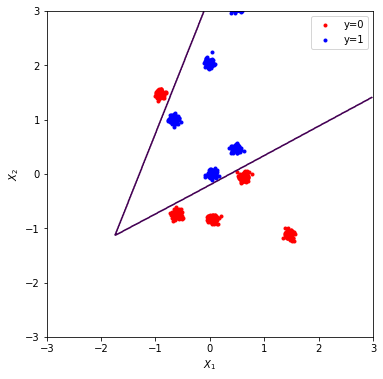

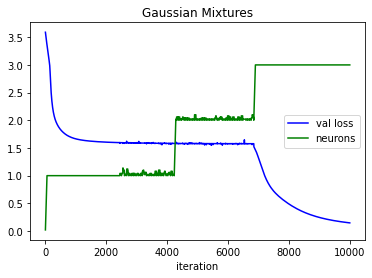

In [4]:
# Implements a self-selecting multilayer perceptron for binary classification
# Notation used mostly follows Andrew Ng's deeplearning.ai course
# Author: Ryan Kingery (rkinger@g.clemson.edu)
# Last Updated: April 2018
# License: BSD 3 clause

#!/usr/bin/env python2
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.signal import lfilter
import time
from utils import *
np.random.seed(2)
    
def BinaryMLP(X, y, layer_dims, X_test=None, y_test=None, lr=0.01, num_iters=1000, 
                  print_loss=True, add_del=False, reg_param=0., delta=0.1, prob=1., 
                  epsilon=1e-4, max_hidden_size=100, tau=50):
                  #del_threshold=0.03, prob_del=0.05, prob_add=0.05, max_hidden_size=300, num_below_margin=5):
    
    parameters, losses, test_losses, num_neurons = \
        MLP(X, y, layer_dims, 'binary', X_test, y_test, lr, num_iters, print_loss, add_del, 
        reg_param, delta,prob,epsilon,max_hidden_size,tau)
    return parameters, losses, test_losses, num_neurons

def BinaryStochasticMLP(X, y, layer_dims, X_test=None, y_test=None, optimizer='sgd', 
                  lr=0.01, batch_size=64, beta1=0.9, beta2=0.999, eps=1e-8, 
                  num_epochs=1000, print_loss=True, add_del=False, reg_param=0.,
                  delta=0.03, prob=.5, epsilon=.001, max_hidden_size=100, tau=30):
                  #del_threshold=0.03, prob_del=1., prob_add=1., max_hidden_size=300, num_below_margin=1):
    
    parameters, losses, test_losses = \
        StochasticMLP(X, y, layer_dims, 'binary', X_test, y_test, optimizer, lr, batch_size,
                  beta1, beta2, eps, num_epochs, print_loss, add_del, reg_param,
                  delta,prob,epsilon,max_hidden_size,tau)
    
    return parameters, losses, test_losses

def gen_data(size=1000,var=2.):
    centers = 5
    M = [np.random.multivariate_normal(np.array([1,0]),.8*np.eye(2)) for i in range(centers)] +\
        [np.random.multivariate_normal(np.array([0,1]),.8*np.eye(2)) for i in range(centers)]
    
    X = np.zeros((size,2))
    y = np.zeros((size,))
    x1 = []
    x2 = []    
    for j in range(size):
        i = np.random.randint(2*centers)
        m = M[i]
        X[j,:] = np.random.multivariate_normal(np.array(m),var*np.eye(2)/centers)
        if i<centers:
            y[j] = 0
            x1 += [X[j,:]]
        else:
            y[j] = 1
            x2 += [X[j,:]]
    x1 = np.array(x1).reshape(len(x1),2)
    x2 = np.array(x2).reshape(len(x2),2)
    return X,y,x1,x2

def plot_model(parameters,x1,x2):
    xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
    XX = np.c_[xx.ravel(), yy.ravel()].T

    yhat = predict(XX,parameters,'binary').reshape(xx.shape)
    
    f, ax = plt.subplots(figsize=(8, 6))
    ax.contour(xx, yy, yhat, levels=[.5])#, cmap="Greys", vmin=0, vmax=.6)
    
    ax.scatter(x1[:,0],x1[:,1],marker='.',c='red',label='y=0')
    ax.scatter(x2[:,0],x2[:,1],marker='.',c='blue',label='y=1')
    
    ax.set(aspect="equal",
           xlim=(-3, 3), ylim=(-3, 3),
           xlabel="$X_1$", ylabel="$X_2$")
    ax.legend(loc='upper right')
    plt.show()


if __name__ == '__main__':
    data_size = 1000
    num_features = 2
    
    #X = np.random.rand(num_features,data_size)
    #y = np.random.randint(0,2,data_size).reshape(1,data_size)
    X,y,x1,x2 = gen_data(size=data_size,var=0.01)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train = X_train.T
    X_test = X_test.T
    y_train = y_train.T.reshape(1,-1)
    y_test = y_test.T.reshape(1,-1)
    
    layer_dims = [X_train.shape[0], 1, 1]
    num_iters = 10000
    lr = 0.1
    #bs = X_train.shape[1] / 16
    
    tin = time.clock()
    parameters,_,ad_loss,num_neurons = \
        BinaryMLP(X_train, y_train, layer_dims, X_test=X_test,
                  y_test=y_test, num_iters=num_iters, add_del=True, 
                  print_loss=True, lr=lr)
    tout = time.clock()
    tdiff = tout-tin
    print('time = %f'% tdiff)
    
    print('training accuracy = %.3f' % score(X_train,y_train,parameters,'binary'))
    print('test accuracy = %.3f' % score(X_test,y_test,parameters,'binary'))
    plot_model(parameters,x1,x2)
    
#    layer_dims = [X_train.shape[0], 10, 1]
#    parameters,_,reg_loss,_ = \
#    BinaryMLP(X_train, y_train, layer_dims, X_test=X_test,
#              y_test=y_test, num_iters=num_iters, add_del=False, 
#              print_loss=True, lr=lr)
#    print('training accuracy = %.3f' % score(X_train,y_train,parameters,'binary'))
#    print('test accuracy = %.3f' % score(X_test,y_test,parameters,'binary'))
#    plot_model(parameters,x1,x2)

    xx = np.linspace(1,num_iters+1,num=num_iters)
    plt.plot(xx,2.*np.max(num_neurons)*np.array(ad_loss),color='blue',label='val loss')
    filt_neurons = lfilter([1.0/50]*50,1,num_neurons)
    plt.plot(xx,filt_neurons,color='green',label='neurons')
    plt.legend(loc='center right')
    plt.xlabel('iteration')
    #plt.ylabel('loss')
    plt.title('Gaussian Mixtures')
    plt.show()

#    parameters,_,ad_loss = BinaryStochasticMLP(X_train, y_train, layer_dims, X_test=X_test, y_test=y_test, 
#                                        num_epochs=num_iters, lr=lr, add_del=True, optimizer='adam', 
#                                        batch_size=bs, print_loss=True)
#    print('train accuracy = %.3f' % score(X_train,y_train,parameters,'binary'))
#    print('test accuracy = %.3f' % score(X_test,y_test,parameters,'binary'))
#    plot_model(parameters,x1,x2)
#    
#    parameters,_,reg_loss = BinaryStochasticMLP(X_train, y_train, layer_dims, X_test=X_test, y_test=y_test, 
#                                       num_epochs=num_iters, lr=lr, add_del=False, optimizer='adam', 
#                                       batch_size=bs, print_loss=True)
#    print('train accuracy = %.3f' % score(X_train,y_train,parameters,'binary'))
#    print('test accuracy = %.3f' % score(X_test,y_test,parameters,'binary'))

#    xx = np.linspace(1,num_iters+1,num=100)
#    plt.plot(xx,ad_loss,color='blue',label='add/del')
#    plt.plot(xx,reg_loss,color='red',label='regular')
#    plt.legend(loc='upper right')
#    plt.xlabel('iteration')
#    plt.ylabel('loss')
#    plt.title('Test Loss')
#    plt.show()
    
    #ps = [0.05, 0.1, 0.15, 0.2, 0.4, 0.5]

In [5]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from scipy.signal import lfilter
from utils import *
np.random.seed(42)

In [6]:
import sklearn
sklearn.__version__

'0.23.1'

Loss after iteration 0: 2.454838
Number of neurons 0: 1
Test loss after epoch 0: 2.362013
Loss after iteration 500: 2.013795
Number of neurons 500: 1
Test loss after epoch 500: 2.013870
Loss after iteration 1000: 1.951750
Number of neurons 1000: 1
Test loss after epoch 1000: 1.957736
Loss after iteration 1500: 1.851666
Number of neurons 1500: 2
Test loss after epoch 1500: 1.862577
Loss after iteration 2000: 1.730925
Number of neurons 2000: 2
Test loss after epoch 2000: 1.740089
Loss after iteration 2500: 1.608022
Number of neurons 2500: 2
Test loss after epoch 2500: 1.612746
Loss after iteration 3000: 1.492266
Number of neurons 3000: 2
Test loss after epoch 3000: 1.499657
Loss after iteration 3500: 1.411660
Number of neurons 3500: 2
Test loss after epoch 3500: 1.427692
Loss after iteration 4000: 1.353020
Number of neurons 4000: 2
Test loss after epoch 4000: 1.379107
Loss after iteration 4500: 1.290117
Number of neurons 4500: 4
Test loss after epoch 4500: 1.326238
Loss after iteration 5

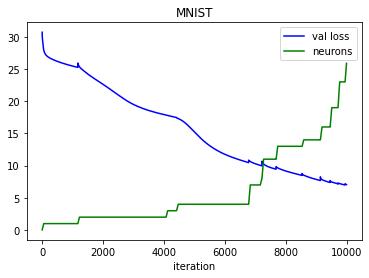

In [7]:
# Implements a self-selecting multilayer perceptron for multiclass classification
# Notation used mostly follows Andrew Ng's deeplearning.ai course
# Author: Ryan Kingery (rkinger@g.clemson.edu)
# Last Updated: April 2018
# License: BSD 3 clause

#!/usr/bin/env python2
# -*- coding: utf-8 -*-

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from scipy.signal import lfilter
from utils import *
np.random.seed(42)

def MulticlassMLP(X, y, layer_dims, X_test=None, y_test=None, lr=0.01, num_iters=1000, 
                  print_loss=False, add_del=False, reg_param=0.,delta=0.01, prob=1., 
                  epsilon=1e-3, max_hidden_size=200, tau=50):
                  #del_threshold=0.03, prob_del=0.05, prob_add=0.05, max_hidden_size=300, num_below_margin=5):
    
    parameters, losses, test_losses, num_neurons = \
        MLP(X, y, layer_dims, 'multiclass', X_test, y_test, lr, num_iters, print_loss, add_del, 
            reg_param, delta,prob,epsilon,max_hidden_size,tau)
    return parameters, losses, test_losses, num_neurons

def MulticlassStochasticMLP(X, y, layer_dims, X_test=None, y_test=None, optimizer='sgd', 
                  lr=0.0007, batch_size=64, beta1=0.9, beta2=0.999, eps=1e-8, print_loss=False,
                  num_epochs=10000, add_del=False, print_add_del=False, reg_param=0.,
                  delta=0.01, prob=0.5, epsilon=0.05, max_hidden_size=100, tau=30):
                  #del_threshold=0.03, prob_del=1., prob_add=1., max_hidden_size=300, num_below_margin=1):
    
    parameters, losses, test_losses = \
        StochasticMLP(X, y, layer_dims, 'multiclass', X_test, y_test, optimizer, lr, batch_size,
                  beta1, beta2, eps, num_epochs, print_loss, add_del, reg_param,
                  delta,prob,epsilon,max_hidden_size,tau)
    
    return parameters, losses, test_losses

if __name__ == '__main__':
#    data_size = 7
#    num_features = 10
#    num_classes = 3
#    
#    X_train = 10.*np.random.rand(num_features,data_size)
#    y_train = np.array([[1,0,0],[0,1,0],[0,0,1],[1,0,0],[0,1,0],[0,0,1],[1,0,0]]).T

    mnist = fetch_openml('mnist_784', data_home=os.getcwd())   
    #mnist = fetch_openml('MNIST original') 
    X = mnist.data.astype(np.float32) / 255.
    y_orig = mnist.target
    # one-hot encode the labels y_orig: i=0,...,9 --> [0,...,1,...,0]
    y = pd.get_dummies(y_orig).values.astype(np.float32)
    
#    pca = PCA(n_components=324)
#    pca.fit(X)
#    X_pca = pca.transform(X)
    
    X,y = shuffle(X,y)
    
    down_sample = 5000
    X_ds = X[:down_sample,:]
    y_ds = y[:down_sample,:]
    
    X_train,X_test,y_train,y_test = train_test_split(X_ds,y_ds,test_size=0.2)
    X_train = X_train.T
    y_train = y_train.T
    X_test = X_test.T
    y_test = y_test.T
    
    num_iters = 10000
    lr = 0.01
    #bs = 128
    num_features = X_train.shape[0]
    num_classes = y_train.shape[0]
    layer_dims = [num_features, 1, num_classes]
    parameters,_,ad_loss,num_neurons = \
    MulticlassMLP(X_train, y_train, layer_dims, X_test=X_test,
                  y_test=y_test, num_iters=num_iters, add_del=True, 
                  print_loss=True, lr=lr)
    print('training accuracy = %.3f' % score(X_train,y_train,parameters,'multiclass'))
    print('test accuracy = %.3f' % score(X_test,y_test,parameters,'multiclass'))
#    
#    #layer_dims = [num_features, 1, num_classes]
#    parameters,_,reg_loss = MulticlassMLP(X_train,y_train, layer_dims, num_iters=num_iters,
#                                   X_test=X_test,y_test=y_test,
#                                   lr=lr, print_loss=False, add_del=False)     
#    print('training accuracy = %.3f' % score(X_train,y_train,parameters,'multiclass'))
#    print('test accuracy = %.3f' % score(X_test,y_test,parameters,'multiclass'))
    
    
#    parameters,adam_loss,_ = MulticlassStochasticMLP(X_train, y_train, layer_dims, X_test=None, y_test=None, 
#                                        num_epochs=num_iters, lr=lr, add_del=False, optimizer='adam', 
#                                        batch_size=bs, print_loss=False)
#    print('train accuracy = %.3f' % score(X_train,y_train,parameters,'multiclass'))
#    print('test accuracy = %.3f' % score(X_test,y_test,parameters,'multiclass'))
#    parameters,sgd_loss,_ = MulticlassStochasticMLP(X_train, y_train, layer_dims, X_test=None, y_test=None, 
#                                       num_epochs=num_iters, lr=lr, add_del=False, optimizer='sgd', 
#                                       batch_size=bs, print_loss=False)
#    print('train accuracy = %.3f' % score(X_train,y_train,parameters,'multiclass'))
#    print('test accuracy = %.3f' % score(X_test,y_test,parameters,'multiclass'))

    ad_loss = np.array(ad_loss)
    num_neurons = np.array(num_neurons)

    xx = np.linspace(0,num_iters,num=num_iters)+1
    plt.plot(xx,.5*np.max(num_neurons)*ad_loss,color='blue',label='val loss')
    filt_neurons = lfilter([1.0/50]*50,1,num_neurons)
    plt.plot(xx,filt_neurons,color='green',label='neurons')
    plt.legend(loc='upper right')
    plt.xlabel('iteration')
    #plt.ylabel('loss')
    plt.title('MNIST')
    plt.show()



Loss after iteration 0: 100879.319113
Number of neurons 0: 1
Test loss after epoch 0: 101566.993046
Loss after iteration 1000: 671.981494
Number of neurons 1000: 100
Test loss after epoch 1000: 733.320627
Loss after iteration 2000: 300.664004
Number of neurons 2000: 100
Test loss after epoch 2000: 325.206707
Loss after iteration 3000: 236.559426
Number of neurons 3000: 100
Test loss after epoch 3000: 254.137502
Loss after iteration 4000: 198.000707
Number of neurons 4000: 100
Test loss after epoch 4000: 213.514233
Loss after iteration 5000: 182.141145
Number of neurons 5000: 100
Test loss after epoch 5000: 197.093859
Loss after iteration 6000: 169.515947
Number of neurons 6000: 100
Test loss after epoch 6000: 178.722418
Loss after iteration 7000: 159.850268
Number of neurons 7000: 100
Test loss after epoch 7000: 160.813889
Loss after iteration 8000: 149.018561
Number of neurons 8000: 100
Test loss after epoch 8000: 145.101601
Loss after iteration 9000: 136.127547
Number of neurons 9000

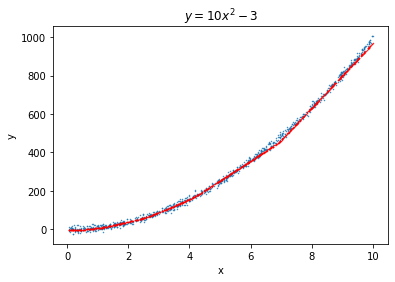

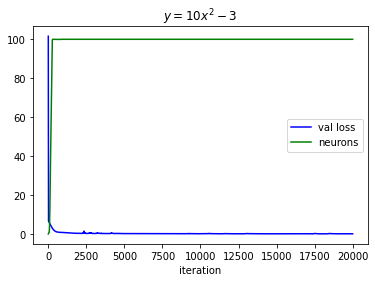

In [8]:
# Implements a self-selecting multilayer perceptron for scalar regression
# Notation used mostly follows Andrew Ng's deeplearning.ai course
# Author: Ryan Kingery (rkinger@g.clemson.edu)
# Last Updated: April 2018
# License: BSD 3 clause

#!/usr/bin/env python2
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.signal import lfilter
from utils import *
np.random.seed(42)

def RegressionMLP(X, y, layer_dims, X_test=None, y_test=None, lr=0.01, num_iters=1000, 
                  print_loss=True, add_del=False, print_add_del=False, 
                  reg_param=0.,delta=0.01, prob=1., epsilon=0.1, max_hidden_size=100, tau=50):
                  #del_threshold=0.03, prob_del=0.05, prob_add=0.05, max_hidden_size=300, num_below_margin=5):
    
    parameters, losses, test_losses, num_neurons = \
        MLP(X, y, layer_dims, 'regression', X_test, y_test, lr, num_iters, print_loss, 
            add_del, reg_param, delta,prob,epsilon,max_hidden_size,tau)
    return parameters, losses, test_losses, num_neurons

def RegressionStochasticMLP(X, y, layer_dims, X_test=None, y_test=None, optimizer='sgd', 
                  lr=0.0007, batch_size=64, beta1=0.9, beta2=0.999, eps=1e-8, 
                  num_epochs=10000, print_loss=True,
                  add_del=False, print_add_del=False, reg_param=0.,
                  delta=0.01, prob=0.5, epsilon=0.05, max_hidden_size=100, tau=30):
                  #del_threshold=0.03, prob_del=1., prob_add=1., max_hidden_size=300, num_below_margin=1):
    
    parameters, losses, test_losses = \
        StochasticMLP(X, y, layer_dims, 'regression', X_test, y_test, optimizer, lr, batch_size,
                  beta1, beta2, eps, num_epochs, print_loss, add_del, print_add_del, reg_param,
                  delta,prob,epsilon,max_hidden_size,tau)
    
    return parameters, losses, test_losses


if __name__ == '__main__':
    data_size = 1000
    num_features = 1
    
    X = 10.*np.random.rand(num_features,data_size)
    #y = 100.*(np.random.choice([1,-1],size=data_size)*np.random.rand(data_size))
    y = 10.*X[0,:]**2 - 3.
    y = y.reshape(1,-1)
    y += 10.*np.random.randn(1,y.shape[1])
    y = y.reshape(1,data_size)
    
    X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2)
    X_train = X_train.T
    X_test = X_test.T
    y_train = y_train.T
    y_test = y_test.T
    
    num_iters = 20000
    lr = 0.1
    
    layer_dims = [X.shape[0],1, 1]
    parameters,_,losses,num_neurons = \
    RegressionMLP(X_train, y_train, layer_dims, num_iters=num_iters,
                  X_test=X_test, y_test=y_test,
                  lr=0.1, print_loss=True, add_del=True)
#    parameters,_,_ = RegressionStochasticMLP(X_train, y_train, layer_dims, optimizer='sgd',
#                                             X_test=None,y_test=None,
#                                             batch_size=128,lr=0.01,num_epochs=5000, 
#                                             print_loss=True, add_del=True)
    print('training R^2 = %.3f' % score(X_train,y_train,parameters,'regression'))
    print('test R^2 = %.3f' % score(X_test,y_test,parameters,'regression'))
    
    #checking model works
    yhat = predict(X,parameters,'regression')
    plt.scatter(X[0,:],y[0,:],s=0.2)
    plt.scatter(X[0,:],yhat[0,:],color='red',s=0.2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('$y=10 x^2 - 3$')
    plt.show()
    
    losses = np.array(losses)
    num_neurons = np.array(num_neurons)

    xx = np.linspace(0,num_iters,num=num_iters)+1
    plt.plot(xx,1e-5*np.max(num_neurons)*losses,color='blue',label='val loss')
    filt_neurons = lfilter([1.0/50]*50,1,num_neurons)
    plt.plot(xx,filt_neurons,color='green',label='neurons')
    plt.legend(loc='center right')
    plt.xlabel('iteration')
    #plt.ylabel('loss')
    plt.title('$y=10 x^2 - 3$')
    plt.show()



# Perf

In [9]:
# initialize directory
#import ss_perf_utils

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.signal import lfilter
import time

def delete_neurons_numpy(W1,b1,W2,b2,delta,prob):
    """
    For NumPy models, deletes neurons with small outgoing weights from layer
    
    Arguments:
    W1 -- weight matrix into hidden layer
    b1 -- bias vector into hidden layer
    W2 -- weight matrix into output layer
    b2 -- bias vector into output layer
    delta -- threshold for deletion of neurons
    prob -- probability of a neuron below threshold being deleted
    
    Returns:
    updated W1, b1, W2, b2
    """
    
    W_out = W2   
    hidden_size = W_out.shape[1]
    
    norms = np.sum(np.abs(W_out),axis=0)
    max_out = np.max(norms)
    selected = (norms == norms) # initialize all True == keep all neurons
    
    for j in range(hidden_size):
        norm = norms[j]
        if (norm < delta*max_out) and (np.random.rand() < prob):
            # remove neuron j with probability prob
            selected[j] = 0
    
    if np.sum(selected) == 0:
        # don't want ALL neurons in layer deleted or training will crash
        # keep neuron with largest outgoing weights if this occurs
        selected[np.argmax(norms)] = 1
             
    W1 = W1[selected,:]
    b1 = b1[selected,:]
    W2 = W2[:,selected]
        
    return W1,b1,W2,b2


def add_neurons_numpy(W1,b1,W2,b2,losses,epsilon,delta,max_hidden_size,tau,prob):
    """
    For NumPy models, adds neuron to bottom of layer if loss is stalling
    
    Arguments:
    W1 -- weight matrix into hidden layer
    b1 -- bias vector into hidden layer
    W2 -- weight matrix into output layer
    b2 -- bias vector into output layer
    epsilon -- range loss function must deviate to not be flagged as stalling
    delta -- threshold for deletion of neurons
    max_hidden_size -- max size allowable for the hidden layer
    tau -- window size to check for stalling in loss function
    prob -- probability of a neuron below threshold being deleted
    
    Returns:
    updated W1, b1, W2, b2
    """
    
    W_in = W1
    b_in = b1
    W_out = W2   
    hidden_size = W_out.shape[1]
    #losses = torch.FloatTensor(losses)
    
    if hidden_size >= max_hidden_size:
        return W1,b1,W2,b2
    
    max_loss = np.max(losses)
    filt_losses = losses#lfilter([1.0/5]*5,1,losses) # filter noise with FIR filter
    losses = filt_losses[-tau:]  # keep only losses in window t-tau,...,t
    upper = np.mean(losses) + epsilon*max_loss
    lower = np.mean(losses) - epsilon*max_loss
    num_out_of_window = (losses < lower) + (losses > upper)

    if (np.sum(num_out_of_window) == 0) and (np.random.rand() < prob):
        # if losses in window are too similar, add neuron with probability prob
        ones = np.ones((1,W_in.shape[1]))
        new_W_in = np.random.normal(0,2.*delta*ones)
        new_b_in = np.zeros((1,1))
        ones = np.ones((W_out.shape[0],1))
        new_W_out = np.random.normal(0,5.*delta*ones)
        W_in = np.append(W_in, new_W_in, axis=0)
        b_in = np.append(b_in, new_b_in, axis=0)
        W_out = np.append(W_out, new_W_out, axis=1)    
    
    W1 = W_in
    b1 = b_in
    W2 = W_out
    
    return W1,b1,W2,b2

def delete_neurons_pytorch(W1,b1,W2,b2,delta,prob):
    """
    For PyTorch models, deletes neurons with small outgoing weights from layer
    
    Arguments:
    W1 -- weight matrix into hidden layer
    b1 -- bias vector into hidden layer
    W2 -- weight matrix into output layer
    b2 -- bias vector into output layer
    delta -- threshold for deletion of neurons
    prob -- probability of a neuron below threshold being deleted
    
    Returns:
    updated W1, b1, W2, b2
    """
    
    W_out = W2   
    hidden_size = W_out.shape[1]
    
    norms = torch.sum(torch.abs(W_out),dim=0)
    max_out = torch.max(norms)
    selected = (norms == norms) # initialize all True == keep all neurons
    
    for j in range(hidden_size):
        norm = norms[j]
        if (norm < delta*max_out) and (torch.rand(1) < prob):
            # remove neuron j with probability prob
            selected[j] = 0
    
    if torch.sum(selected) == 0:
        # don't want ALL neurons in layer deleted or training will crash
        # keep neuron with largest outgoing weights if this occurs
        selected[torch.argmax(norms)] = 1
             
    W1 = W1[selected,:]
    b1 = b1[selected,:]
    W2 = W2[:,selected]
        
    return W1,b1,W2,b2


def add_neurons_pytorch(W1,b1,W2,b2,losses,epsilon,delta,max_hidden_size,tau,
                        prob,device):
    """
    For PyTorch models, adds neuron to bottom of layer if loss is stalling
    
    Arguments:
    W1 -- weight matrix into hidden layer
    b1 -- bias vector into hidden layer
    W2 -- weight matrix into output layer
    b2 -- bias vector into output layer
    epsilon -- range loss function must deviate to not be flagged as stalling
    delta -- threshold for deletion of neurons
    max_hidden_size -- max size allowable for the hidden layer
    tau -- window size to check for stalling in loss function
    prob -- probability of a neuron below threshold being deleted
    
    Returns:
    updated W1, b1, W2, b2
    """
    
    W_in = W1
    b_in = b1
    W_out = W2   
    hidden_size = W_out.shape[1]
    losses = torch.FloatTensor(losses)
    
    if hidden_size >= max_hidden_size:
        return W1,b1,W2,b2
    
    max_loss = torch.max(losses)
    filt_losses = losses#lfilter([1.0/5]*5,1,losses) # filter noise with FIR filter
    losses = filt_losses[-tau:]  # keep only losses in window t-tau,...,t
    upper = torch.mean(losses) + epsilon*max_loss
    lower = torch.mean(losses) - epsilon*max_loss
    num_out_of_window = (losses < lower) + (losses > upper)

    if (torch.sum(num_out_of_window).item() == 0) and (torch.rand(1) < prob):
        # if losses in window are too similar, add neuron with probability prob
        ones = torch.ones(1,W_in.shape[1],device=device)#.cuda()
        new_W_in = torch.tensor(torch.normal(0,2.*delta*ones),device=device)#.cuda()
        new_b_in = torch.zeros(1,1,device=device)#.cuda()
        ones = torch.ones(W_out.shape[0],1,device=device)#.cuda()
        new_W_out = torch.tensor(torch.normal(0,5.*delta*ones),device=device)#.cuda()
        W_in = torch.cat((W_in, new_W_in), dim=0)
        b_in = torch.cat((b_in, new_b_in), dim=0)
        W_out = torch.cat((W_out, new_W_out), dim=1)    
    
    W1 = W_in
    b1 = b_in
    W2 = W_out
    
    return W1,b1,W2,b2

def gen_data(samples=1000,var=2.):
    """
    Generates sample data from a Gaussian mixture model with centroid variance var 
    """
    centers = 5
    M = [np.random.multivariate_normal(np.array([1,0]),.8*np.eye(2)) for i in range(centers)] +\
        [np.random.multivariate_normal(np.array([0,1]),.8*np.eye(2)) for i in range(centers)]
    
    X = np.zeros((samples,2))
    y = np.zeros((samples,))
    x1 = []
    x2 = []    
    for j in range(samples):
        i = np.random.randint(2*centers)
        m = M[i]
        X[j,:] = np.random.multivariate_normal(np.array(m),var*np.eye(2)/centers)
        if i<centers:
            y[j] = 0
            x1 += [X[j,:]]
        else:
            y[j] = 1
            x2 += [X[j,:]]
    x1 = np.array(x1).reshape(len(x1),2)
    x2 = np.array(x2).reshape(len(x2),2)
    return X,y,x1,x2

def init_add_del():
    delta = 0.01
    prob = 1.0
    epsilon = 1e-5
    max_hidden_size = 100
    tau = 50
    return delta,prob,epsilon,max_hidden_size,tau

X torch.Size([2, 1000])
y torch.Size([1, 1000])
W1 torch.Size([4, 2])
b1 torch.Size([4, 1])
W2 torch.Size([1, 4])
b2 torch.Size([1, 1])
Z1 torch.Size([4, 1000])
A torch.Size([4, 1000])
z2 torch.Size([1, 1000])
yhat torch.Size([1, 1000])
dyhat torch.Size([1, 1000])
dZ2 torch.Size([1, 1000])
dW2 torch.Size([1, 4])
db2 torch.Size([1, 1])
dA torch.Size([4, 1000])
dZ1 torch.Size([4, 1000])
dW1 torch.Size([4, 2])
db1 torch.Size([4, 1])
loss after iteration 0: 0.870671
# neurons after iteration 0: 4
time = 0.053600


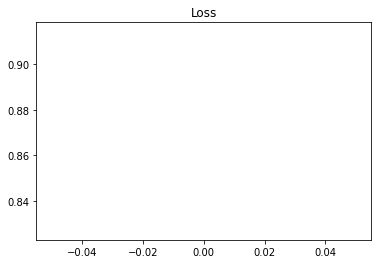

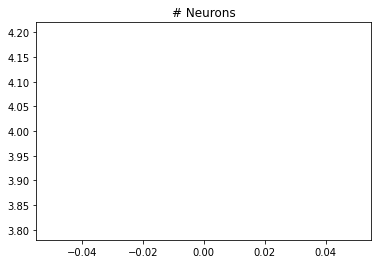

In [11]:
# PyTorch implementation of self-selecting MLP for binary classification
# Author: Ryan Kingery (rkinger@g.clemson.edu)
# Last Updated: May 2018
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.signal import lfilter
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
#from ss_perf_utils import *

np.random.seed(2)
torch.manual_seed(2)

global device,dtype
#device = torch.device('cuda:0')
device = torch.device('cpu')
dtype = torch.float

def train_pytorch(X,y,layer_dims,num_iters,lr=0.01,add_del=False):
    sigmoid = lambda z : 1./(1+torch.exp(-z))
    
    din,dh,dout = tuple(layer_dims)
    m = X.shape[1]
    delta,prob,epsilon,max_hidden_size,tau = init_add_del()
    losses = []
    num_neurons = []
    
    print ('X',X.shape)
    print ('y',y.shape)
    
    W1 = torch.randn(dh, din, dtype=dtype, requires_grad=False, device=device)
    print ('W1',W1.shape)
    b1 = torch.randn(dh, 1, dtype=dtype, requires_grad=False, device=device)
    print ('b1',b1.shape)
    W2 = torch.randn(dout, dh, dtype=dtype, requires_grad=False, device=device)
    print ('W2',W2.shape)
    b2 = torch.randn(dout, 1, dtype=dtype, requires_grad=False, device=device)
    print ('b2',b2.shape)
    
    for t in range(num_iters):
        # Forwardprop
        Z1 = torch.mm(W1,X)+b1
        print ('Z1',Z1.shape)
        A = Z1.clamp(min=0) # relu
        print ('A',Z1.shape)
        Z2 = torch.mm(W2,A)+b2
        print ('z2',Z2.shape)
        yhat = sigmoid(Z2).clamp(1e-6,1.-1e-6)
        print ('yhat',yhat.shape)
    
        criterion = nn.BCELoss()
        loss = criterion(yhat,y)
        loss = loss.squeeze_().item()
        losses.append(loss)
    
        # Backprop
        dyhat = -(torch.div(y,yhat) - torch.div(1-y, 1-yhat))
        print ('dyhat',dyhat.shape)
        dZ2 = dyhat*sigmoid(Z2)*(1-sigmoid(Z2))
        print ('dZ2',dZ2.shape)
        dW2 = 1./m*torch.mm(dZ2,A.t())
        print ('dW2',W2.shape)
        db2 = 1./m*torch.sum(dZ2,1,keepdim=True)
        print ('db2',db2.shape)
        dA = torch.mm(W2.t(),dZ2)
        print ('dA',dA.shape)
        dZ1 = dA
        dZ1[Z1 < 0] = 0
        print ('dZ1',dZ1.shape)
        dW1 = 1./m*torch.mm(dZ1,X.t())
        print ('dW1',dW1.shape)
        db1 = 1./m*torch.sum(dZ1,1,keepdim=True)
        print ('db1',db1.shape)
    
        # gradient descent
        W1 -= lr*dW1
        b1 -= lr*db1
        W2 -= lr*dW2
        b2 -= lr*db2

        if add_del and t>tau:
            W1,b1,W2,b2 = delete_neurons_pytorch(W1,b1,W2,b2,delta,prob)
            W1,b1,W2,b2 = add_neurons_pytorch(W1,b1,W2,b2,losses,epsilon,delta,
                                              max_hidden_size,tau,prob,device)
        num_neurons.append(b1.shape[0])

        if t % max(1,num_iters // 20) == 0:
            print('loss after iteration %i: %f' % (t, losses[-1]))
            if add_del:
                print('# neurons after iteration %i: %d' % (t, num_neurons[-1]))
    
    return losses,num_neurons


if __name__ == '__main__':
    num_iters = 1
    num_samples = 1000
    num_features = 2
    num_hidden = 4
    num_classes = 1
    lr = 0.1
    layer_dims = [num_features,num_hidden,num_classes]
    
    X,y,x1,x2 = gen_data(samples=num_samples,var=0.01)
    X = torch.tensor(X,device=device,dtype=dtype).t()
    y = torch.tensor(y,device=device,dtype=dtype).reshape(1,-1)
    
    tin = time.clock()
    losses,num_neurons = train_pytorch(X,y,layer_dims,num_iters,lr=lr,add_del=True)
    tout = time.clock()
    tdiff = tout-tin
    print('time = %f' % tdiff)
    
    losses = np.array(losses)
    filt_neurons = lfilter([1.0/50]*50,1,num_neurons)
    filt_neurons[filt_neurons<1] = num_hidden
    
    plt.plot(losses,color='blue')
    plt.title('Loss')
    plt.show()
    
    plt.plot(filt_neurons,color='green')
    plt.title('# Neurons')
    plt.show()    
    
    #plot_model(model,x1,x2)
    #print score(model,X,y)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.signal import lfilter
import time
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
#from keras.optimizers import SGD
from keras import backend as K

#from ss_perf_utils import *

np.random.seed(2)
torch.manual_seed(2)

In [13]:
def train_numpy(X,y,layer_dims,num_iters,lr,add_del=False):
    sigmoid = lambda z : 1./(1+np.exp(-z))
    
    din,dh,dout = tuple(layer_dims)
    m = X.shape[1]
    delta,prob,epsilon,max_hidden_size,tau = init_add_del()
    losses = []
    num_neurons = []
    
    W1 = np.random.randn(dh,din)
    b1 = np.random.randn(dh,1)
    W2 = np.random.randn(dout,dh)
    b2 = np.random.randn(dout,1)
    
    for t in range(num_iters):
        # Forwardprop
        Z1 = np.dot(W1,X)+b1
        A = Z1.clip(min=0) # relu
        Z2 = np.dot(W2,A)+b2
        yhat = sigmoid(Z2).clip(1e-6,1.-1e-6)
    
        loss = 1./m*(-np.dot(y,np.log(yhat).T)-np.dot(1-y,np.log(1-yhat).T))
        loss = loss.squeeze().item()
        losses.append(loss)
    
        # Backprop
        dyhat = -(np.divide(y,yhat) - np.divide(1-y, 1-yhat))
        dZ2 = dyhat*sigmoid(Z2)*(1-sigmoid(Z2))
        dW2 = 1./m*np.dot(dZ2,A.T)
        db2 = 1./m*np.sum(dZ2,1,keepdims=True)
        dA = np.dot(W2.T,dZ2)
        dZ1 = dA
        dZ1[Z1 < 0] = 0
        dW1 = 1./m*np.dot(dZ1,X.T)
        db1 = 1./m*np.sum(dZ1,1,keepdims=True)
    
        # gradient descent
        W1 -= lr*dW1
        b1 -= lr*db1
        W2 -= lr*dW2
        b2 -= lr*db2

        if add_del and t>tau:
            W1,b1,W2,b2 = delete_neurons_numpy(W1,b1,W2,b2,delta,prob)
            W1,b1,W2,b2 = add_neurons_numpy(W1,b1,W2,b2,losses,epsilon,delta,
                                              max_hidden_size,tau,prob)
        num_neurons.append(b1.shape[0])

        if 0==1:#t % max(1,num_iters // 20) == 0:
            print('loss after iteration %i: %f' % (t, losses[-1]))
            if add_del:
                print('# neurons after iteration %i: %d' % (t, num_neurons[-1]))
    
    return losses,num_neurons


In [14]:
def train_pytorch(X,y,layer_dims,num_iters,lr,device,dtype,add_del=False):
    sigmoid = lambda z : 1./(1+torch.exp(-z))
    
    din,dh,dout = tuple(layer_dims)
    m = X.shape[1]
    delta,prob,epsilon,max_hidden_size,tau = init_add_del()
    losses = []
    num_neurons = []
    
    W1 = torch.randn(dh, din, dtype=dtype, requires_grad=False, device=device)
    b1 = torch.randn(dh, 1, dtype=dtype, requires_grad=False, device=device)
    W2 = torch.randn(dout, dh, dtype=dtype, requires_grad=False, device=device)
    b2 = torch.randn(dout, 1, dtype=dtype, requires_grad=False, device=device)
    
    for t in range(num_iters):
        # Forwardprop
        Z1 = torch.mm(W1,X)+b1
        A = Z1.clamp(min=0) # relu
        Z2 = torch.mm(W2,A)+b2
        yhat = sigmoid(Z2).clamp(1e-6,1.-1e-6)
    
        criterion = nn.BCELoss()
        loss = criterion(yhat,y)
        loss = loss.squeeze_().item()
        losses.append(loss)
    
        # Backprop
        dyhat = -(torch.div(y,yhat) - torch.div(1-y, 1-yhat))
        dZ2 = dyhat*sigmoid(Z2)*(1-sigmoid(Z2))
        dW2 = 1./m*torch.mm(dZ2,A.t())
        db2 = 1./m*torch.sum(dZ2,1,keepdim=True)
        dA = torch.mm(W2.t(),dZ2)
        dZ1 = dA
        dZ1[Z1 < 0] = 0
        dW1 = 1./m*torch.mm(dZ1,X.t())
        db1 = 1./m*torch.sum(dZ1,1,keepdim=True)
    
        # gradient descent
        W1 -= lr*dW1
        b1 -= lr*db1
        W2 -= lr*dW2
        b2 -= lr*db2

        if add_del and t>tau:
            W1,b1,W2,b2 = delete_neurons_pytorch(W1,b1,W2,b2,delta,prob)
            W1,b1,W2,b2 = add_neurons_pytorch(W1,b1,W2,b2,losses,epsilon,delta,max_hidden_size,tau,prob,device)
        num_neurons.append(b1.shape[0])

        if 0==1:#t % max(1,num_iters // 20) == 0:
            print('loss after iteration %i: %f' % (t, losses[-1]))
            if add_del:
                print('# neurons after iteration %i: %d' % (t, num_neurons[-1]))
    
    return losses,num_neurons

In [15]:
def train_tensorflow(X,y,layer_dims,num_iters,lr):
    din,dh,dout = tuple(layer_dims)
    m = X.shape[0]
    delta,prob,epsilon,max_hidden_size,tau = init_add_del()
    losses = []
    num_neurons = []
    
    model = Sequential()
    model.add(Dense(dh, activation='relu', input_dim=din))
    model.add(Dense(dout, activation='sigmoid'))
    sgd = SGD(lr=lr, decay=1., momentum=0., nesterov=False)
    model.compile(loss='binary_crossentropy',optimizer=sgd)
    model.fit(X, y, epochs=num_iters, batch_size=y.shape[0], verbose=0)
    
    return losses,num_neurons

In [16]:
num_runs = 100
num_iters = 1000
num_samples = 10000
num_features = 2
num_hidden = 10
num_classes = 1
lr = 0.1
layer_dims = [num_features,num_hidden,num_classes]

X,y,x1,x2 = gen_data(samples=num_samples,var=0.01)

In [17]:
X_np = X.T
y_np = y.reshape(1,-1)

times_np = []
print('numpy starting')
for run in tqdm(range(num_runs)):
    tin = time.clock()
    losses,num_neurons = train_numpy(X_np,y_np,layer_dims,num_iters,lr,add_del=False)
    tout = time.clock()
    times_np.append(tout-tin)
print('numpy finished')

numpy starting


100%|██████████| 100/100 [13:13<00:00,  7.94s/it]

numpy finished


In [18]:
device = torch.device('cpu')
dtype = torch.float

X_pt = torch.tensor(X,device=device,dtype=dtype).t()
y_pt = torch.tensor(y,device=device,dtype=dtype).reshape(1,-1)


times_pt_cpu = []
print('pytorch cpu starting')
for run in tqdm(range(num_runs)):
    tin = time.clock()
    losses,num_neurons = train_pytorch(X_pt,y_pt,layer_dims,num_iters,lr,device,dtype,add_del=False)
    tout = time.clock()
    times_pt_cpu.append(tout-tin)
print('pytorch cpu finished')

pytorch cpu starting


100%|██████████| 100/100 [02:43<00:00,  1.63s/it]

pytorch cpu finished


In [ ]:
device = torch.device('cuda:0')
dtype = torch.float

X_pt = torch.tensor(X,device=device,dtype=dtype).t()
y_pt = torch.tensor(y,device=device,dtype=dtype).reshape(1,-1)


times_pt_gpu = []
print('pytorch gpu starting')
for run in tqdm(range(num_runs)):
    tin = time.clock()
    losses,num_neurons = train_pytorch(X_pt,y_pt,layer_dims,num_iters,lr,device,dtype,add_del=False)
    tout = time.clock()
    times_pt_gpu.append(tout-tin)
print('pytorch gpu finished')

In [ ]:
from tensorflow.keras.optimizers import SGD

X_tf = X
y_tf = y

times_tf = []
print('tensorflow starting')
for run in tqdm(range(num_runs)):
    tin = time.clock()
    losses,num_neurons = train_tensorflow(X_tf,y_tf,layer_dims,num_iters,lr)
    tout = time.clock()
    times_tf.append(tout-tin)
print('tensorflow finished')

In [ ]:
plt.hist(times_np)
plt.title('numpy times')
plt.show()

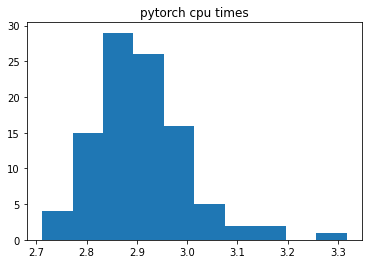

In [40]:
plt.hist(times_pt_cpu)
plt.title('pytorch cpu times')
plt.show()

In [49]:
plt.hist(times_pt_gpu)
plt.title('pytorch gpu times')
plt.show()

NameError: name 'times_pt_gpu' is not defined

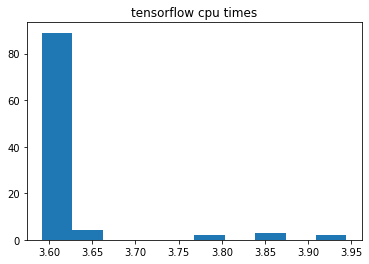

In [43]:
plt.hist(times_tf)
plt.title('tensorflow cpu times')
plt.show()

NameError: name 'times_pt_gpu' is not defined

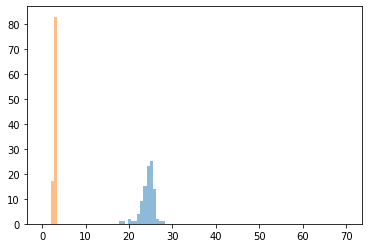

In [44]:
bins = np.linspace(0, 70, 100)

plt.hist(times_np, bins, alpha=0.5, label='np')
plt.hist(times_pt_cpu, bins, alpha=0.5, label='pt cpu')
plt.hist(times_pt_gpu, bins, alpha=0.5, label='pt gpu')
plt.hist(times_tf, bins, alpha=0.5, label='tf cpu')
plt.legend(loc='upper right')
plt.xlabel('runtime (sec)')
plt.title('runtime histograms')
plt.show()

In [45]:
print(np.mean(times_np))
print(np.mean(times_pt_cpu))
print(np.mean(times_pt_gpu))
print(np.mean(times_tf))

24.283075869999998
2.908265020000026


NameError: name 'times_pt_gpu' is not defined

loss after iteration 0: 1.351279
# neurons after iteration 0: 1
loss after iteration 500: 0.455735
# neurons after iteration 500: 2
loss after iteration 1000: 0.325371
# neurons after iteration 1000: 2
loss after iteration 1500: 0.299435
# neurons after iteration 1500: 2
loss after iteration 2000: 0.293333
# neurons after iteration 2000: 2
loss after iteration 2500: 0.290836
# neurons after iteration 2500: 2
loss after iteration 3000: 0.289461
# neurons after iteration 3000: 2
loss after iteration 3500: 0.288587
# neurons after iteration 3500: 2
loss after iteration 4000: 0.287966
# neurons after iteration 4000: 2
loss after iteration 4500: 0.287518
# neurons after iteration 4500: 2
loss after iteration 5000: 0.286441
# neurons after iteration 5000: 5
loss after iteration 5500: 0.154327
# neurons after iteration 5500: 5
loss after iteration 6000: 0.087877
# neurons after iteration 6000: 5
loss after iteration 6500: 0.053017
# neurons after iteration 6500: 5
loss after iteration 7000: 0

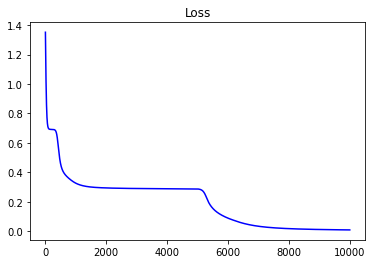

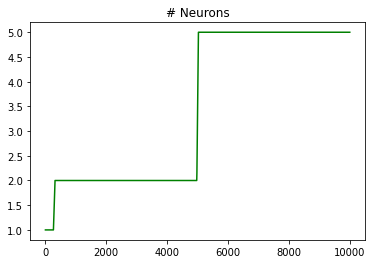

In [47]:
# Numpy implementation of self-selecting MLP for binary classification
# Author: Ryan Kingery (rkinger@g.clemson.edu)
# Last Updated: May 2018
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.signal import lfilter
import time
#from ss_perf_utils import *

np.random.seed(2)

def train_numpy(X,y,layer_dims,num_iters,lr=0.01,add_del=False):
    sigmoid = lambda z : 1./(1+np.exp(-z))
    
    din,dh,dout = tuple(layer_dims)
    m = X.shape[1]
    delta,prob,epsilon,max_hidden_size,tau = init_add_del()
    losses = []
    num_neurons = []
    
    W1 = np.random.randn(dh,din)
    b1 = np.random.randn(dh,1)
    W2 = np.random.randn(dout,dh)
    b2 = np.random.randn(dout,1)
    
    for t in range(num_iters):
        # Forwardprop
        Z1 = np.dot(W1,X)+b1
        A = Z1.clip(min=0) # relu
        Z2 = np.dot(W2,A)+b2
        yhat = sigmoid(Z2).clip(1e-6,1.-1e-6)
    
        loss = 1./m*(-np.dot(y,np.log(yhat).T)-np.dot(1-y,np.log(1-yhat).T))
        loss = loss.squeeze().item()
        losses.append(loss)
    
        # Backprop
        dyhat = -(np.divide(y,yhat) - np.divide(1-y, 1-yhat))
        dZ2 = dyhat*sigmoid(Z2)*(1-sigmoid(Z2))
        dW2 = 1./m*np.dot(dZ2,A.T)
        db2 = 1./m*np.sum(dZ2,1,keepdims=True)
        dA = np.dot(W2.T,dZ2)
        dZ1 = dA
        dZ1[Z1 < 0] = 0
        dW1 = 1./m*np.dot(dZ1,X.T)
        db1 = 1./m*np.sum(dZ1,1,keepdims=True)
    
        # gradient descent
        W1 -= lr*dW1
        b1 -= lr*db1
        W2 -= lr*dW2
        b2 -= lr*db2

        if add_del and t>tau:
            W1,b1,W2,b2 = delete_neurons_numpy(W1,b1,W2,b2,delta,prob)
            W1,b1,W2,b2 = add_neurons_numpy(W1,b1,W2,b2,losses,epsilon,delta,
                                              max_hidden_size,tau,prob)
        num_neurons.append(b1.shape[0])

        if t % max(1,num_iters // 20) == 0:
            print('loss after iteration %i: %f' % (t, losses[-1]))
            if add_del:
                print('# neurons after iteration %i: %d' % (t, num_neurons[-1]))
    
    return losses,num_neurons

if __name__ == '__main__':
    num_iters = 10000
    num_samples = 1000
    num_features = 2
    num_hidden = 1
    num_classes = 1
    lr = 0.1
    layer_dims = [num_features,num_hidden,num_classes]
    
    X,y,x1,x2 = gen_data(samples=num_samples,var=0.01)
    X = X.T
    y = y.reshape(1,-1)
    
    tin = time.clock()
    losses,num_neurons = train_numpy(X,y,layer_dims,num_iters,lr=lr,add_del=True)
    tout = time.clock()
    tdiff = tout-tin
    print('time = %f' % tdiff)
    
    #losses = np.array(losses)
    filt_neurons = lfilter([1.0/50]*50,1,num_neurons)
    filt_neurons[filt_neurons<1] = num_hidden
    
    plt.plot(losses,color='blue')
    plt.title('Loss')
    plt.show()
    
    plt.plot(filt_neurons,color='green')
    plt.title('# Neurons')
    plt.show()    
    
    #plot_model(model,x1,x2)
    #print score(model,X,y)